## Event Driven Simulation 

### Scheduling CoMP

In [1]:
import eds
import simpy
import numpy as np
import pandas as pd
import scipy
SCHEDULE_T=2
import matplotlib.pyplot as plt
import show as sh

In [2]:
env=simpy.Environment()
#env = simpy.rt.RealtimeEnvironment(factor=1/10)

ue_list=np.array([])
ue_list2=np.array([])
#define UEs

    
max_prb=50
thr=6
cluster=[19,20]

ue_nr=100

x=np.append(np.ones(ue_nr)*19,np.ones(ue_nr)*20)
y=np.append(np.ones(ue_nr)*20,np.ones(ue_nr)*19)
sinr=np.random.randint(-5,15,ue_nr*2)
sinr2=np.random.randint(0,18,ue_nr*2)

rt_nrt=np.array([])
rt_nrt=np.append(rt_nrt,np.ones(ue_nr*2)*0)

df=pd.DataFrame()
df['PCI Serving']=x
df['PCI Coord']=y
df['JT_1 SINR [lin]']=sinr
df['JT_2 SINR [lin]']=sinr2
df['usage']=rt_nrt
df['id']=np.arange(0,ue_nr*2)
   
df['PCI Serving']=df['PCI Serving'].astype('int')
df['PCI Coord']=df['PCI Coord'].astype('int')

df['JT_1 SINR [lin]']=df['JT_1 SINR [lin]'].astype('int')
df['JT_2 SINR [lin]']=df['JT_2 SINR [lin]'].astype('int')

In [3]:
df2=df

In [4]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,160))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\eds.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


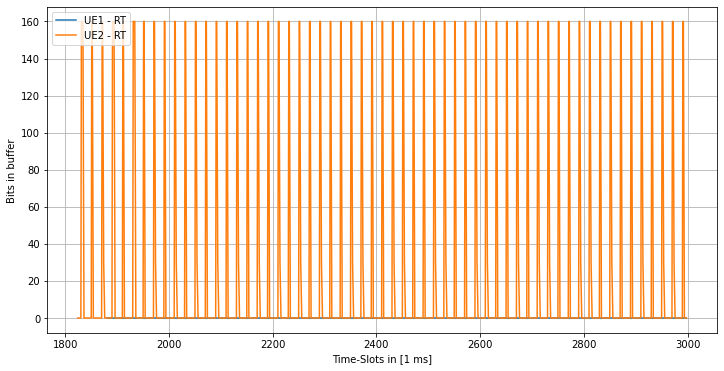

In [5]:
plt.figure(figsize=(12,6))
plt.plot(list(ue_all[20].mon.keys())[1000:3000],list(ue_all[20].mon.values())[1000:3000],label='UE1 - RT')
plt.plot(list(ue_all[30].mon.keys())[1000:3000],list(ue_all[30].mon.values())[1000:3000],label='UE2 - RT')
#plt.plot(list(ue_all[47].mon.keys()),list(ue_all[47].mon.values()),label='UE3 - RT')
#plt.plot(list(ue_list[120].mon.keys())[1000:3000],list(ue_list[120].mon.values())[1000:3000],label='UE4')
plt.xlabel('Time-Slots in [1 ms]')
plt.ylabel('Bits in buffer')
plt.legend(loc="upper left")
plt.grid()
#plt.axvline(x = 13, color = 'b', label = 'axvline - full height')
#plt.axvline(x = 27, color = 'b', label = 'axvline - full height')

In [6]:
df=eds.ue_to_df(ue_all[0:49])

No handles with labels found to put in legend.


-0.0038569647579866917
0
-67.59124026165159
0
0.0
0
-22.5348826554862
0
0.0
0
0.0
0
0.23416621082461564
1
0.13937779009349782
1
0.0
0
0.10125286819937518
1
-33.0108208224149
0
0.17401990389276367
1
-34.565299534407444
0
0.10753884723178064
1
0.0
0
0.11691344641773238
1
0.0865501191538387
1
0.0
0
0.0
0
0.0
0
0.23964775178209052
1
0.0
0
0.17854808146566814
1
0.07035083631212746
1
0.17309068580873
1
0.2973400048614794
1
-5.242532665761246e-05
0
0.0
0
0.0
0
0.07035083631212746
1
-33.45120593605249
0
0.26538446515957936
1
-0.009803194437751905
0
0.0
0
-0.0024608111713231295
0
-7.896629118375742e-05
0
0.0
0
0.11153555178524677
1
0.09922462143037158
1
0.12001931983809389
1
-13.624318669309721
0
0.07596292873641719
1
-0.0005224995417552059
0
0.0
0
0.0
0
0.0
0
0.23003224020938795
1
0.0
0
-14.312596347503115
0
-0.0004111077445800859
0
0.07162982491097925
1
0.14083372361057833
1
0.0
0
0.0
0
0.4552981311064297
1
-0.0049421577797081895
0
0.4849387424530782
1
0.10643486822277115
1
0.3304575973786638

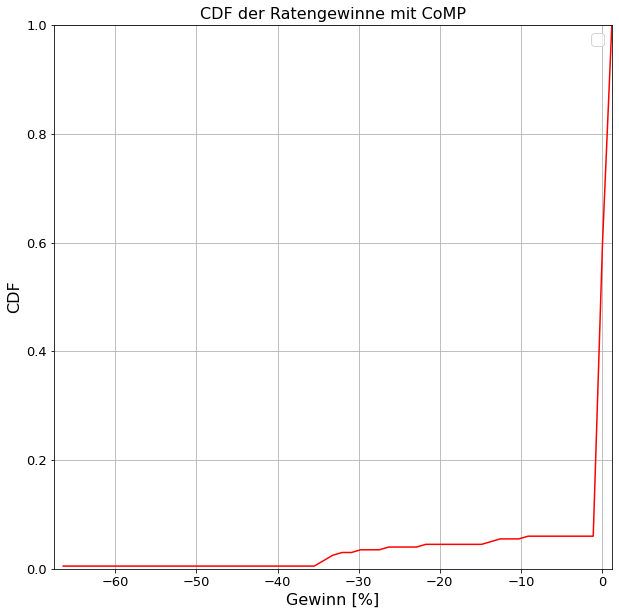

In [7]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)

sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)

In [14]:
print('comp prb perc',prb_number_comp/(prb_number_normal+prb_number_comp))
print('comp user perc',len(ue_comp)/len(ue_all))

comp prb perc 0.65
comp user perc 0.4


In [9]:
df=df2
env=simpy.Environment()

In [10]:
ue_dict=eds.df_to_ue_lists(df,[19,20],6,env)
ue_all=np.array([])
for i in cluster:
    ue_all=np.append(ue_all,ue_dict[i])

prb_number_comp=eds.calculate_prb_number(ue_all,max_prb)
prb_number_normal=max_prb-prb_number_comp

#Start processes
    
for i in cluster:
    ue_list=ue_dict[i]
    for j in np.arange(0,ue_nr):
        env.process(ue_list[j].rt_user(env,16000))
        
ue_comp=np.array([]) #ues that use comp -> processed be central_scheduler
for i in cluster:
    ue_list=ue_dict[i]
    new_ue_list=np.array([])
    for j in ue_list:
        if(j.comp == 0):
            new_ue_list=np.append(new_ue_list,j)
        else:
            ue_comp=np.append(ue_comp,j)
    ue_dict[i]=new_ue_list #user without comp
    
env.process(eds.central_scheduler(env,ue_comp,SCHEDULE_T,[19,20],prb_number_comp))

counter=0
for i in cluster:
    ue_list=ue_dict[i]
    ue_19=ue_all[counter*ue_nr:((counter+1)*ue_nr)]
    env.process(eds.scheduler(env,ue_19,SCHEDULE_T,[19,20],max_prb,ue_list,prb_number_normal,1))
    counter=counter+1
env.run(until=3000)

C:\Users\Caroline Zoll\EDS\eds.py:173: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((i.cp)**e1/(i.mR**e2)))
C:\Users\Caroline Zoll\EDS\eds.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  metric=np.append(metric,((cp)**e1/(i.mR2)**e2))


No handles with labels found to put in legend.


-51.99870534741164
0
0.0
0
-51.849808830867495
0
-50.922917547667865
0
-51.12610963128999
0
-50.191888523916475
0
289.67018608351844
1
467.331357269822
1
-53.223855550130736
0
117.72916750966513
1
-49.89538573830442
0
326.32752923587196
1
-49.89624347862643
0
507.2463091546903
1
-51.85791241632172
0
49.78868241489358
1
301.6127176404161
1
-51.43016020059876
0
-51.433455814640936
0
-51.84770879902746
0
287.2619429607873
1
-51.42955645600749
0
145.41519261237988
1
382.2263987628947
1
198.09176197115863
1
463.19715097069167
1
-51.43270266170145
0
-51.838507679827
0
-52.641647036078986
0
311.32266531022833
1
-50.79099194061381
0
115.45230991902015
1
-50.88991115307005
0
-51.6304466623158
0
-50.89264387417367
0
-50.282448551882084
0
-50.08710549724725
0
178.87810035795027
1
147.78021346363687
1
119.79603420228769
1
0.0
0
208.32438912184443
1
-50.29191329895506
0
-51.430837674088
0
-50.30224042053446
0
-51.84031260283163
0
304.4248861660093
1
-50.14406620253035
0
21.042322235850254
0
-48.877

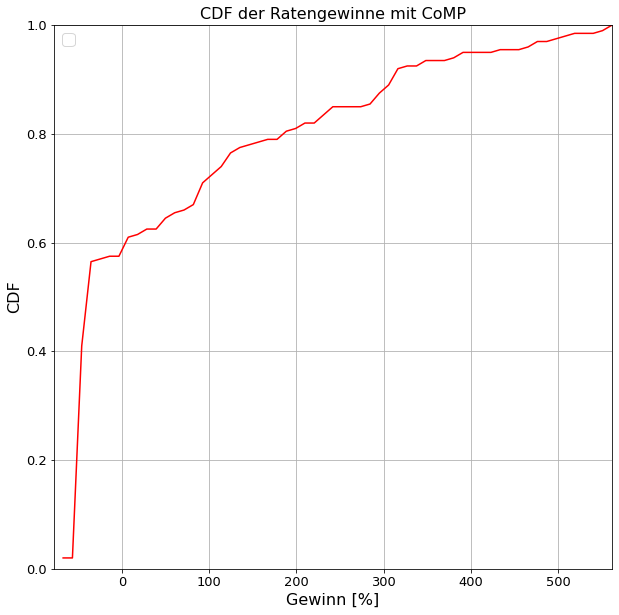

In [11]:
av=0
liste=np.array([])
for i in ue_all:
    liste=np.append(liste,((i.mR2/i.mR)-1)*100)
    av+=i.mR2/i.mR
    print(((i.mR2/i.mR)-1)*100)
    print(i.comp)
av=av/(ue_nr*2)
print('CoMP-gain',av)


sh.cdf_1(liste,'','red','CDF der Ratengewinne mit CoMP',min(liste),max(liste),'Gewinn [%]',60)